In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Loading Dataset
df = pd.read_csv("RTA Dataset.csv")

In [9]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [40]:
df.shape

(12316, 33)

In [10]:
# Check for null values in the entire dataset
null_values = df.isnull().sum()
print(null_values)


Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [11]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [22]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties,Hour
count,12316,12316.000000,12316.000000,12316.000000
mean,2024-06-29 14:17:50.768106752,2.040679,1.548149,13.835823
min,2024-06-29 00:01:00,1.000000,1.000000,0.000000
25%,2024-06-29 10:31:00,2.000000,1.000000,10.000000
50%,2024-06-29 15:10:00,2.000000,1.000000,15.000000
75%,2024-06-29 18:10:00,2.000000,2.000000,18.000000
max,2024-06-29 23:59:00,7.000000,8.000000,23.000000
std,NaN,0.688790,1.007179,5.202923


In [7]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

C:\Users\DELL\AppData\Local\Temp\ipykernel_3880\3799280019.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


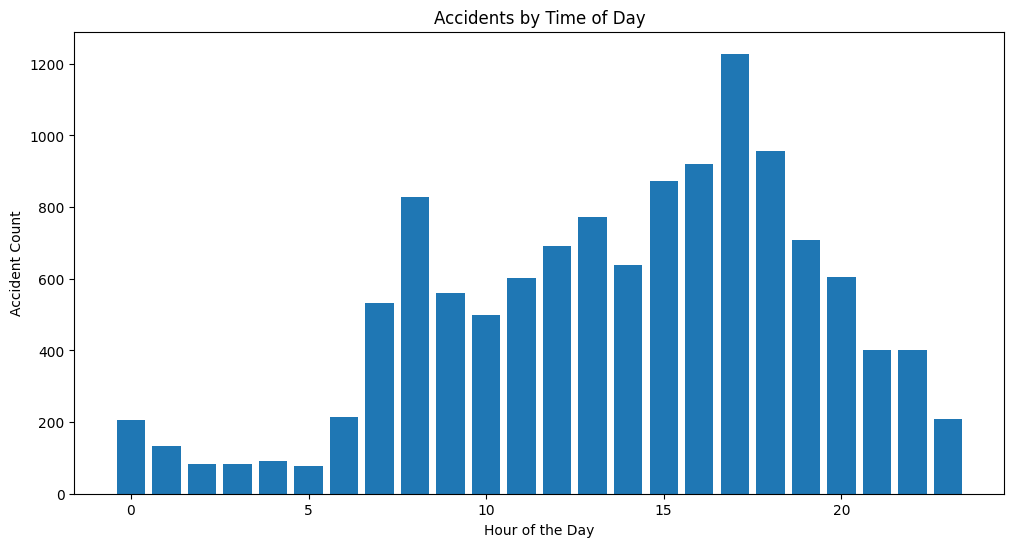

In [13]:
##EDA
## Time of Day Analysis
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
time_of_day_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(time_of_day_counts.index, time_of_day_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Time of Day')
plt.show()

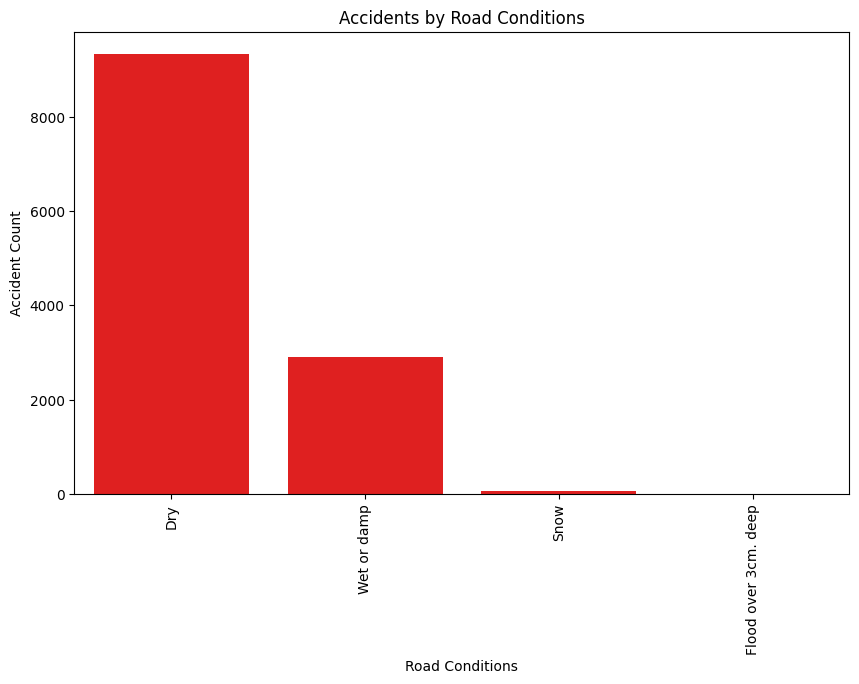

In [15]:
# Road Condition Analysis
road_condition_counts = df['Road_surface_conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values,color='red')
plt.xticks(rotation=90)
plt.xlabel('Road Conditions')
plt.ylabel('Accident Count')
plt.title('Accidents by Road Conditions')
plt.show()

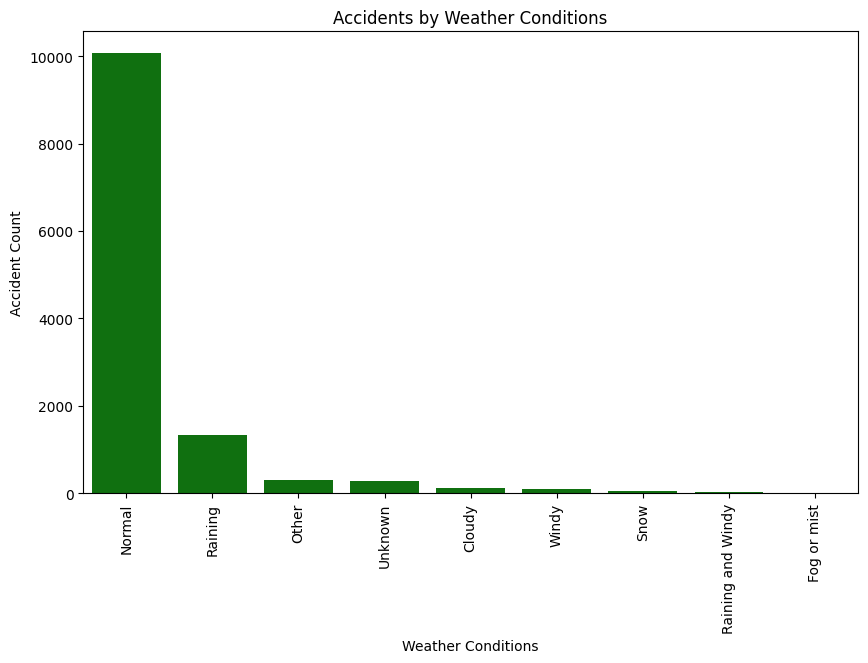

In [16]:
# Weather Analysis
weather_counts = df['Weather_conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values,color='green')
plt.xticks(rotation=90)
plt.xlabel('Weather Conditions')
plt.ylabel('Accident Count')
plt.title('Accidents by Weather Conditions')
plt.show()


In [17]:
import random

def random_palette():
    """
    Create a random palette each every time
    """
    # Creating a mix of multiple palettes
    base_palette = sns.color_palette("pastel", 5) + sns.color_palette("tab20c", 5) + sns.color_palette("tab20b", 5)
    # Sample specific colors from the base palette
    colour_list = random.sample(base_palette, 5)
    # Blend the palettes to create a new palette
    palette = sns.blend_palette([colour for colour in colour_list], 10)
    return palette

In [18]:
def subplot(df, i, column, order=None, pallete=random_palette()):
    plt.subplot(2, 3 ,i)
    sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
    plt.xticks(rotation=45)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3880\4259700003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3880\4259700003.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3880\4259700003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=ran

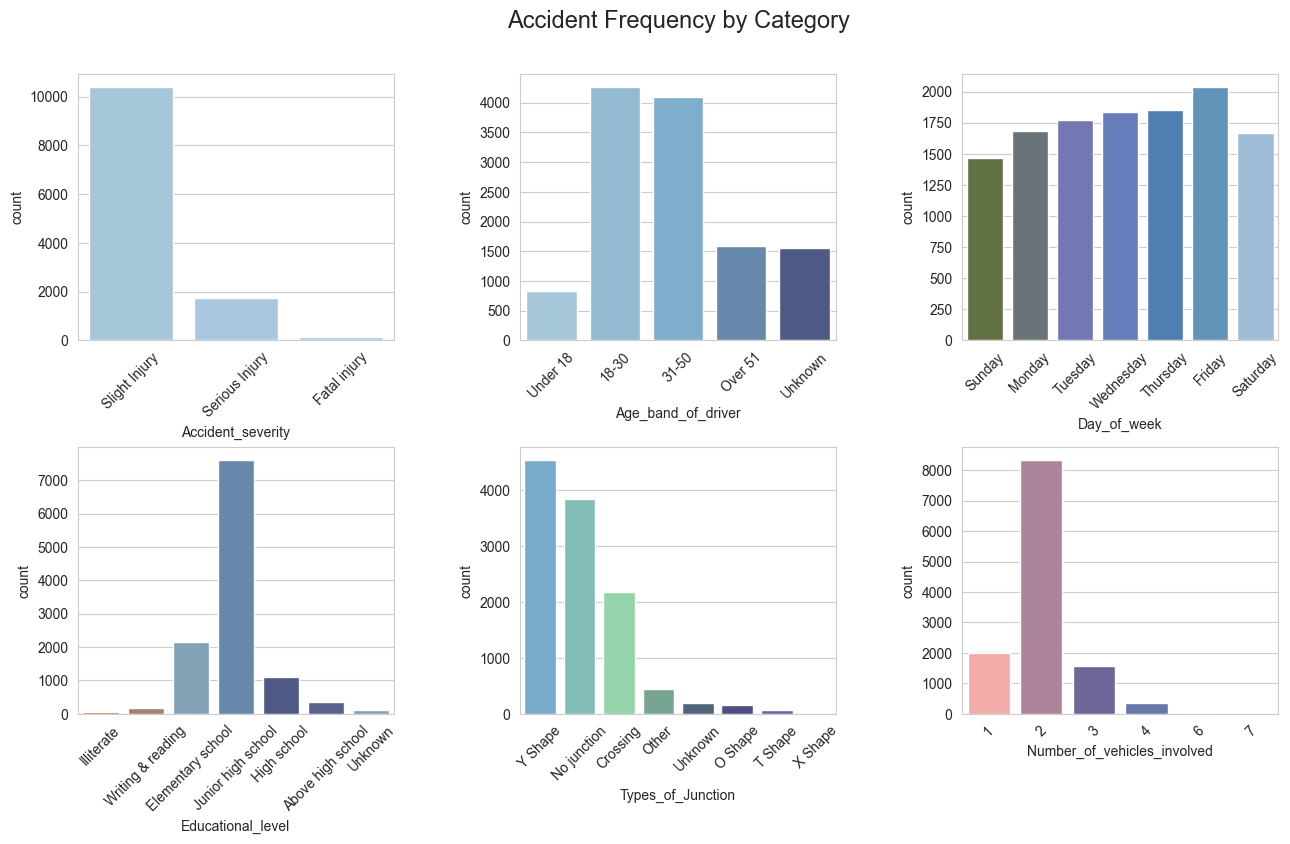

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.suptitle("Accident Frequency by Category", fontsize=17)

subplot(df, i=1, column = 'Accident_severity')

age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
subplot(Accidents, i=2, column = 'Age_band_of_driver', order= age_order)

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
subplot(Accidents, i=3, column = 'Day_of_week', order=day_order)

education_order= ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]

subplot(df, i=4, column = 'Educational_level', order=education_order)

subplot(df, i=5, column = 'Types_of_Junction')
subplot(df, i=6, column = 'Number_of_vehicles_involved')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

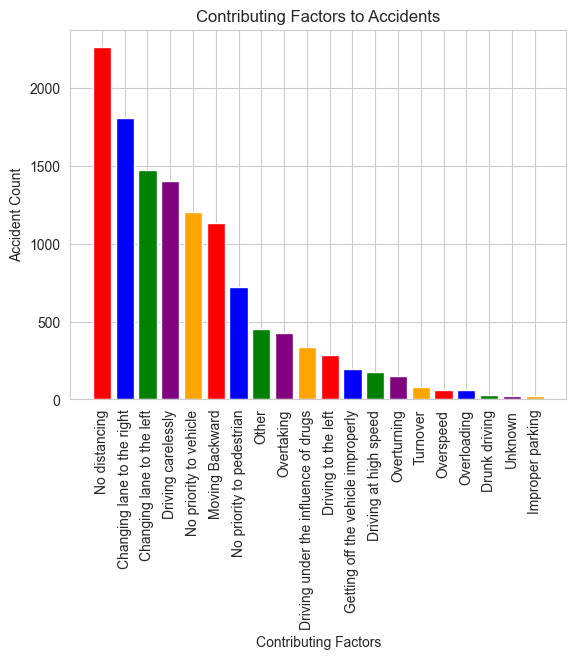

In [39]:
# Contributing Factors Analysis
contributing_factors_ = df['Cause_of_accident'].value_counts()
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.bar(contributing_factors_.index, contributing_factors_.values,color=colors)
plt.xticks(rotation=90)
plt.xlabel('Contributing Factors')
plt.ylabel('Accident Count')
plt.title('Contributing Factors to Accidents')
plt.show()

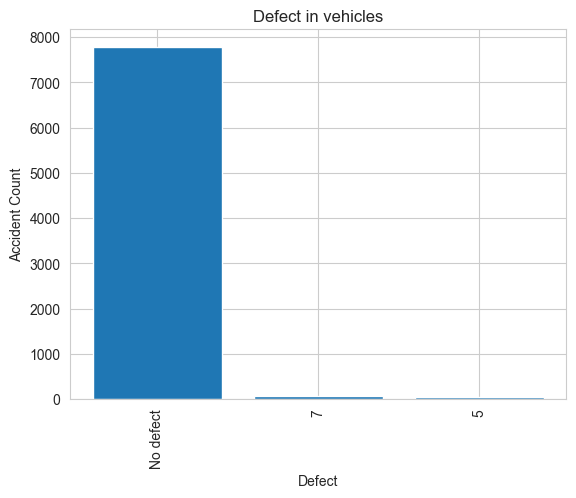

In [28]:
 # Defect in vehicles
defect_count = df['Defect_of_vehicle'].value_counts()
plt.bar(defect_count.index, defect_count.values)
plt.xticks(rotation=90)
plt.xlabel('Defect')
plt.ylabel('Accident Count')
plt.title('Defect in vehicles')
plt.show()
    

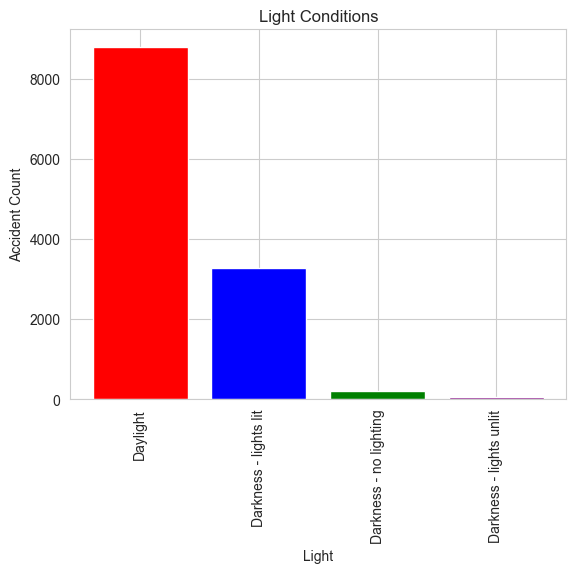

In [33]:
#Light Conditions
Light_count = df['Light_conditions'].value_counts()
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.bar(Light_count.index, Light_count.values,color=colors)
plt.xticks(rotation=90)
plt.xlabel('Light')
plt.ylabel('Accident Count')
plt.title('Light Conditions')
plt.show()
    

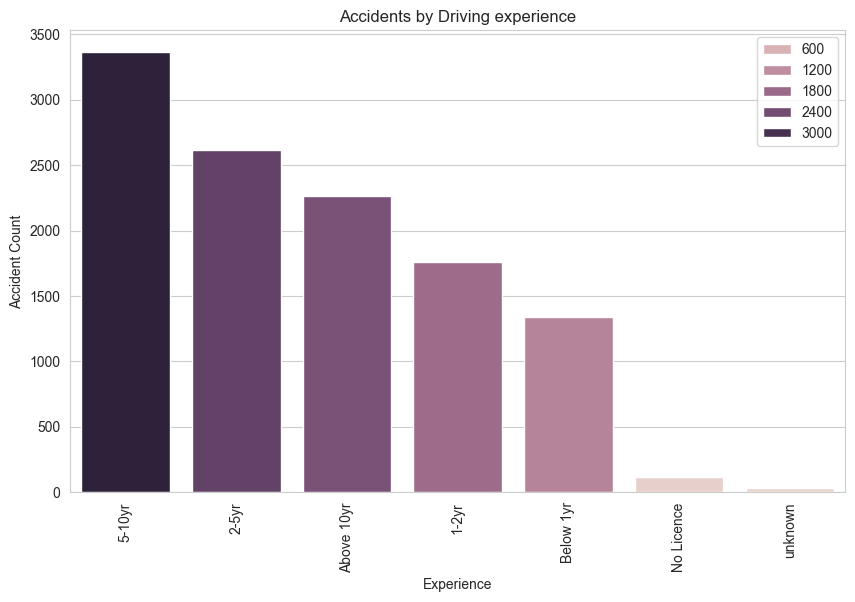

In [36]:
# Driving Experience Analysis
exp_counts = df['Driving_experience'].value_counts()
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(10, 6))
sns.barplot(x=exp_counts.index, y=exp_counts.values,hue=exp_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Experience')
plt.ylabel('Accident Count')
plt.title('Accidents by Driving experience')
plt.show()


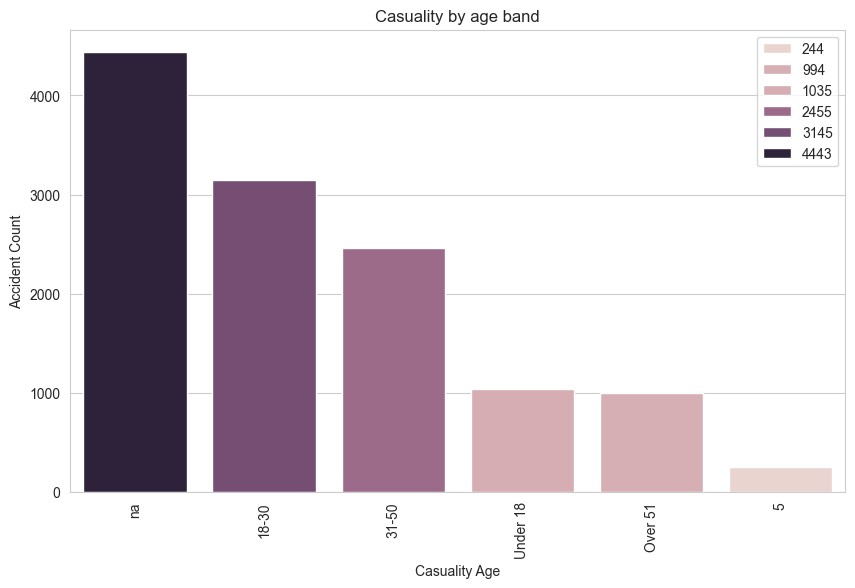

In [38]:
# Age band of casuality
age_counts = df['Age_band_of_casualty'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values,hue=age_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Casuality Age')
plt.ylabel('Accident Count')
plt.title('Casuality by age band')
plt.show()

